# Practico N° 4 - Mentoria - Aprendizaje No Supervisado

El objectivo de este practico es realizar [Clustering](https://es.wikipedia.org/wiki/Algoritmo_de_agrupamiento) sobre el Dataset de las Caracteristicas de los jugadores.

De forma de juntar en los clusters a los jugadores con caracteristicas similares, y en particular de este practico analizar si estos clusters se corresponden con la posicion en la que juegan estos jugadores.

<h1><FONT COLOR="#e600e5"> Autor: Melania Omonte</FONT></h1>

---

<h2> Importaciones </h2>

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import warnings

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
import scikitplot as skplt

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')



In [3]:
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

In [4]:
# Seteamos una semilla para Reproducibilidad
np.random.seed(1)

---

<h2> Carga del Dateset</h2>
Cargo el dataset con los datos y muestro el total de filas y columnas

In [5]:
player_df = pd.read_csv('football_player_full.csv', index_col='player_name')

#player_df.set_index('player_name', inplace=True)
print("Shape 'player_df' = {}".format(player_df.shape))

# Copy Dataframe
player2_df = player_df.copy(deep=False)

Shape 'player_df' = (9925, 36)


Muestro las primeras 10 columnas del dataset

In [6]:
player_df.sample(10)

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,position
player_name,,,,,,,,,,,,,,,,,,,,,
Ariel Borysiuk,66.12,74.38,56.92,49.79,49.38,67.25,58.88,64.08,45.79,52.38,...,49.21,51.58,63.58,63.08,12.71,13.04,18.71,15.54,13.04,MID
Sava Miladinovic Bento,58.00,64.43,51.07,44.86,42.93,58.14,46.21,58.29,50.64,52.86,...,49.50,41.64,46.57,40.07,8.00,8.00,8.00,7.00,14.00,MID
Dusan Tadic,78.16,81.88,81.52,68.36,56.64,78.60,69.84,81.36,79.72,73.08,...,76.28,39.96,35.56,27.56,10.16,10.16,12.56,8.16,15.16,MID
Samuel Souprayen,64.24,71.76,58.29,20.76,57.19,56.90,22.10,55.71,61.67,31.67,...,42.71,65.62,65.19,66.90,8.33,10.95,15.19,14.19,14.19,DEF
Daniele Croce,67.68,67.68,63.32,51.58,44.74,72.16,53.89,66.16,54.95,58.74,...,59.74,52.26,56.89,59.53,11.74,11.74,5.74,7.74,12.74,MID
John Arne Riise,76.32,77.64,84.00,60.82,67.05,78.32,75.05,69.41,74.05,77.55,...,70.59,75.45,79.59,80.59,13.27,10.09,33.14,13.50,13.68,DEF
Saidy Janko,62.13,76.53,58.73,40.60,56.73,51.20,34.27,67.07,41.73,36.27,...,51.20,58.53,65.87,64.60,5.27,9.27,7.27,13.27,7.27,DEF
Helder Postiga,76.04,76.93,59.33,71.19,78.19,64.56,78.56,73.56,65.81,52.85,...,70.59,25.37,28.11,27.19,12.00,9.81,20.67,16.37,14.59,FW
Denzel Slager,61.50,70.75,60.25,59.00,43.00,58.75,59.00,65.12,64.00,48.00,...,50.00,20.62,20.00,21.00,14.00,8.00,11.00,11.00,15.00,FW


Verificamos los tipos de datos del dataset player_df

In [7]:
player_df.dtypes

overall_rating        float64
potential             float64
crossing              float64
finishing             float64
heading_accuracy      float64
short_passing         float64
volleys               float64
dribbling             float64
curve                 float64
free_kick_accuracy    float64
long_passing          float64
ball_control          float64
acceleration          float64
sprint_speed          float64
agility               float64
reactions             float64
balance               float64
shot_power            float64
jumping               float64
stamina               float64
strength              float64
long_shots            float64
aggression            float64
interceptions         float64
positioning           float64
vision                float64
penalties             float64
marking               float64
standing_tackle       float64
sliding_tackle        float64
gk_diving             float64
gk_handling           float64
gk_kicking            float64
gk_positio

Verificamos cuantos registros hay de cada uno

In [8]:
print("Columna:",player_df.groupby('position').size())

Columna: position
DEF    3664
FW     1919
GK      869
MID    3473
dtype: int64


Seleccionamos 3 columnas para visualizar: potential, agility, vision y las cruzamos para ver si nos dan alguna pista de su agrupación y la relación con sus positiones

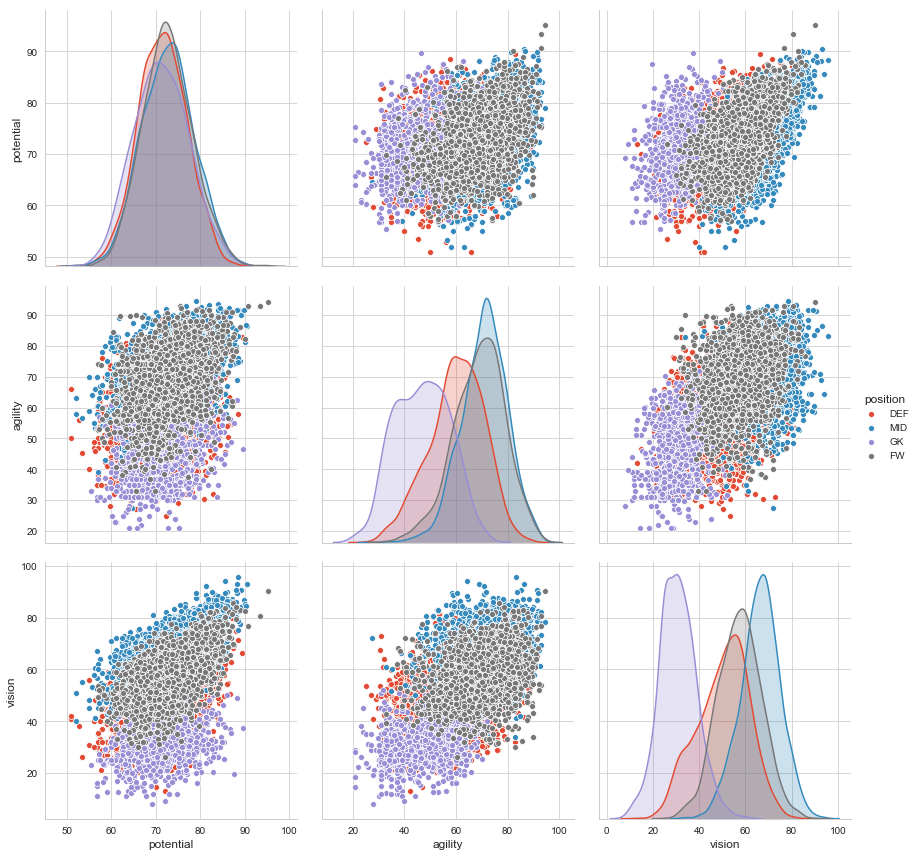

In [9]:
sns.pairplot(player_df.dropna(), hue='position',size=4,vars=["potential","agility","vision"],kind='scatter')

Guardamos la lista de la posicion de los jugadores

In [10]:
player_position_list = player_df.position.tolist()

Muestro las distintas posiciones utilizando otro metodo

In [11]:
# function to get unique values 
def unique(list1): 
    x = np.array(list1) 
    print(np.unique(x)) 
    
unique(player_position_list) 

['DEF' 'FW' 'GK' 'MID']


Definimos la estructura de datos con la cual alimentaremos el algoritmo

In [12]:
player_df = player_df[[
    'overall_rating', 'potential', 'crossing', 'finishing', 'heading_accuracy',
    'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
    'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility',
    'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength',
    'long_shots', 'aggression', 'interceptions', 'positioning', 'vision',
    'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
    'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes',
]]

Muestro los tipos del array definido mas arriba

In [13]:
player_df.dtypes

overall_rating        float64
potential             float64
crossing              float64
finishing             float64
heading_accuracy      float64
short_passing         float64
volleys               float64
dribbling             float64
curve                 float64
free_kick_accuracy    float64
long_passing          float64
ball_control          float64
acceleration          float64
sprint_speed          float64
agility               float64
reactions             float64
balance               float64
shot_power            float64
jumping               float64
stamina               float64
strength              float64
long_shots            float64
aggression            float64
interceptions         float64
positioning           float64
vision                float64
penalties             float64
marking               float64
standing_tackle       float64
sliding_tackle        float64
gk_diving             float64
gk_handling           float64
gk_kicking            float64
gk_positio

In [14]:
player_df.sample(10)

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
player_name,,,,,,,,,,,,,,,,,,,,,
Rolando Mandragora,60.93,73.13,47.87,44.33,48.07,69.33,41.67,60.07,49.67,33.67,...,65.07,31.67,46.67,57.00,52.73,12.67,13.67,8.67,13.67,15.67
Daniel Pinillos,59.71,66.14,59.57,32.14,48.14,48.29,33.14,52.29,57.57,39.14,...,43.86,46.14,57.86,63.57,70.43,6.14,15.14,10.14,12.14,6.14
Stopira,60.25,65.00,56.00,28.00,32.00,49.00,32.00,44.00,47.00,42.00,...,51.00,45.00,62.00,59.50,66.00,8.00,13.00,11.00,13.00,5.00
Kakha Kaladze,78.50,83.10,67.30,32.80,77.10,71.20,46.00,51.70,44.00,48.30,...,61.00,64.20,81.90,81.60,72.70,11.00,15.30,49.10,14.60,17.80
Sergi Darder,69.43,75.61,48.91,39.13,35.65,77.17,36.04,63.83,61.87,54.26,...,75.00,38.26,52.61,64.48,61.13,6.26,9.26,5.26,13.26,5.26
Zeljko Brkic,75.00,77.12,18.50,19.00,17.50,32.71,16.58,20.17,17.88,18.42,...,27.33,31.54,19.00,19.92,20.92,80.58,70.00,59.50,76.88,78.92
Stephen Elliott,66.50,70.93,52.79,67.14,65.64,59.79,61.14,64.21,52.00,47.71,...,64.93,63.43,32.50,31.43,25.00,13.57,10.79,22.79,9.29,9.43
Adil Ramzi,66.17,66.17,61.67,55.67,50.00,71.00,54.00,69.33,49.00,70.00,...,70.67,75.00,48.67,33.33,35.33,12.00,6.00,10.00,10.00,9.00
Igor Bubnjic,69.47,76.18,28.76,20.59,68.12,45.65,30.12,36.12,34.76,34.12,...,34.06,43.12,74.12,75.59,72.29,11.76,11.76,13.76,12.76,4.76


Trazamos una matriz de correlaciones, ya que tenemos un conjunto de datos con un gran número de características, 

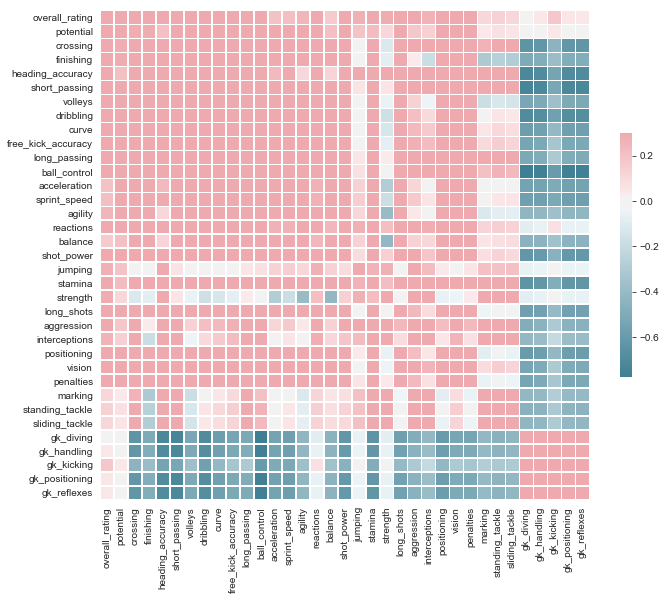

In [15]:
def plot_corr(player2_df):
    corr = player2_df.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    f, ax = plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

plot_corr(player2_df)

### Aplicamos Clustering sobre las features de los jugadores

Usamos [K-Means]para el clustering.

Probamos primero con 4 clusters, este numero se debe a cantidad de clases con respecto a la posicion de los jugadores:
* **GK**: Goalkeeper (Arquero)
* **DEF**: Defenser (Defensor)
* **MID**: Midfielder (Mediocampistas)
* **FW**: Forward (Delantero)

Luego de hacer clustering, vemos cuantos elementos tiene cada cluster. Ejecutamos el algoritmo para 4 clusters y obtenemos las etiquetas

In [16]:
kmeans=KMeans(n_clusters=4).fit(player_df)
print(kmeans)
print('Suma de los cuadrados de las distancias al clusters / Inertia: ', kmeans.inertia_)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
Suma de los cuadrados de las distancias al clusters / Inertia:  25234814.267621763


Visualizamos los centroides de los clusters 

In [17]:
centroids = kmeans.cluster_centers_
print('Mostramos las coordenadas de los centroides')
print(centroids)

Mostramos las coordenadas de los centroides
[[64.08988403 69.84300786 46.49642349 31.88138421 61.69737374 57.39560793
  32.9628208  47.00283577 39.22787505 37.56971193 52.72996633 55.70340067
  61.74582866 63.05716798 56.9231388  60.4104003  60.17333333 50.74353161
  67.35137673 65.56865694 71.00908343 37.04451178 66.50736251 62.03877666
  40.89347924 46.62543584 44.32420127 63.23297793 65.92087542 63.73903853
   9.97573887 11.1563786  14.6909278  11.3010737  11.21983539]
 [67.21331147 72.81909584 57.24261266 64.68939817 57.4087279  63.01983172
  60.3352567  68.23450371 58.84691671 53.19196235 53.21686823 68.26194238
  73.3655733  73.24033657 71.49944381 64.5250656  68.42403594 67.48299201
  64.59006275 64.7340502  62.69759555 61.04813177 51.91968625 35.61887621
  65.10920422 60.96377638 61.82029093 27.62692812 31.00964347 28.32905305
   9.9503223  11.42658871 15.13956075 11.33781232 11.3050599 ]
 [66.67705409 71.28097814 18.63902186 18.07620253 19.11841197 27.80100115
  17.29941312 18

### Elegir el valor de K

Buscamos mediante la grafica el «punto codo», para encontrar el mejor valor k. 
Observamos que el mejor valor k es el 4.

Text(0.5, 1.0, 'Inercia de los k-means vs clusters')

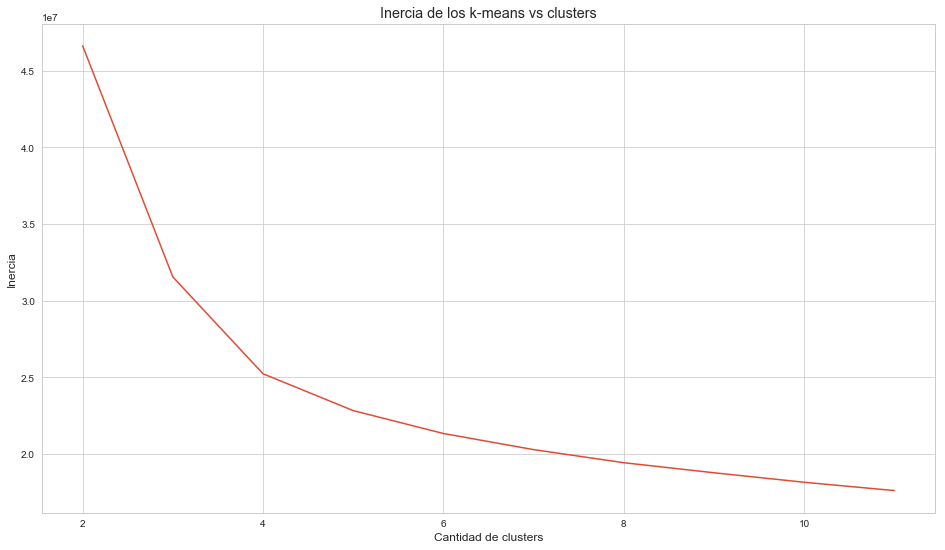

In [18]:
scores = [KMeans(n_clusters=i+2).fit(player_df).inertia_ for i in range(10)]
plt.plot(np.arange(2, 12), scores)
plt.xlabel('Cantidad de clusters')
plt.ylabel("Inercia")
plt.title("Inercia de los k-means vs clusters")

Ahora veremos esto en una gráfica 3D con colores para los grupos y veremos si se diferencian

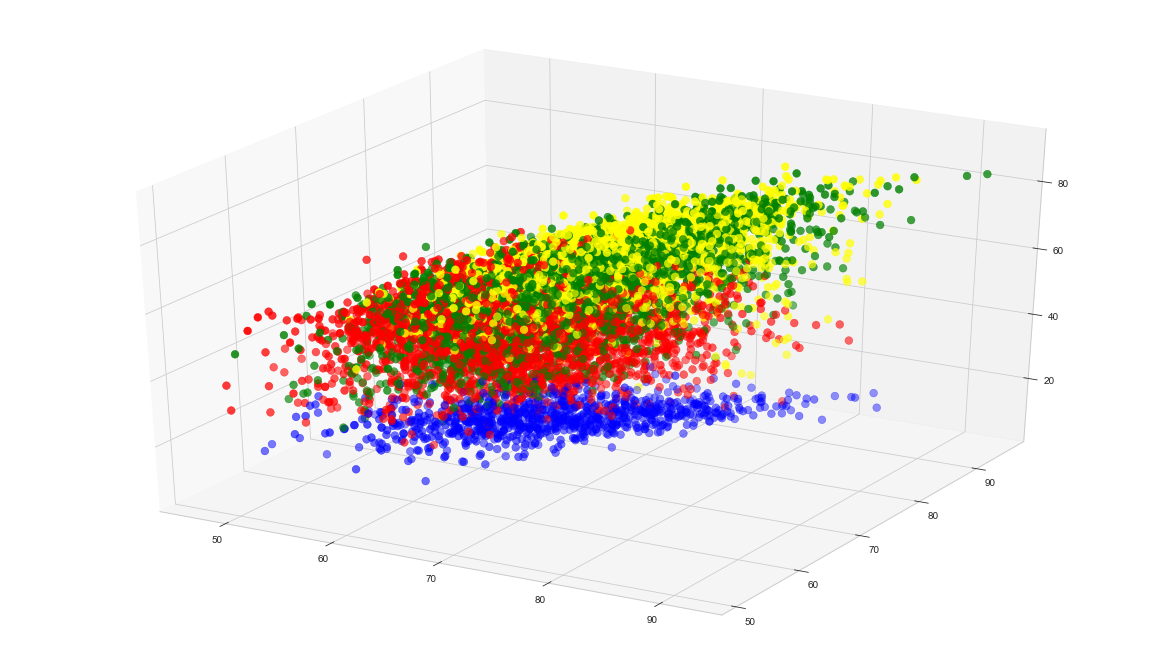

In [19]:
labels = kmeans.predict(player_df)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(player_df.iloc[:, 0], player_df.iloc[:, 1], player_df.iloc[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

Realizamos el conteo la cantidad de Posiciones

In [20]:
pd.DataFrame(player2_df.position.value_counts()) 

,position
DEF,3664
MID,3473
FW,1919
GK,869


Realizamos el conteo por clusters

In [21]:
pd.DataFrame(pd.DataFrame(labels, columns = ['cluster']).cluster.value_counts())

,cluster
1,3506
3,2877
0,2673
2,869


Verificamos cada uno de los clusters cuantas posiciones tiene

In [22]:
copy =  pd.DataFrame()
copy['position']=player2_df['position'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['position']=copy.groupby('label').size()
cantidadGrupo.sort_values(by=['position'], ascending=False)

,color,position
1,green,3506
3,yellow,2877
0,red,2673
2,blue,869


##### Evaluacion resultados

Evaluamos los resultados del clustering usando una medida como la [Pureza]


In [23]:
matriz = metrics.cluster.contingency_matrix(player_position_list, labels)
print(matriz)

[[2417    0    0 1247]
 [   3 1881    0   35]
 [   0    0  869    0]
 [ 253 1625    0 1595]]


In [24]:
print('Pureza: {}'.format(matriz.max(axis = 1).sum() / matriz.sum()))

Pureza: 0.6843324937027708


In [25]:
from sklearn.metrics.cluster import normalized_mutual_info_score

print('NMI: {}'.format(normalized_mutual_info_score(player_position_list, labels)))


from sklearn.metrics.cluster import adjusted_rand_score

print('Rand index: {}'.format(adjusted_rand_score(player_position_list, labels)))

NMI: 0.5629166802850829
Rand index: 0.4033761167152728


### Verificamos diferentes numero de clusters

Usamos diferentes numero de clusters, para observar las subdivisiones de las clases.

**Nota**: Las posiciones asignadas a los jugadores son simplificadas, esto quiere decir que al hacer mas de 4 clusters podemos llegar descubrir posiciones mas especificas dentro del campo de juego (por ejemplo: Defensor central, Lateral derecho/izquierdo, Mediocampista defensivo/ofensivo, etc.)


Calculamos ademas la Pureza para analizar si tener una mayor cantidad de clusters da mejores resultados.

In [26]:
for bucle in range(2, 10):
    km_pred = KMeans(n_clusters = bucle, random_state = 42).fit_predict(player_df)
    km_pred
    contingency_matrix = metrics.cluster.contingency_matrix(player_position_list, km_pred)
    print('Pureza para k={}: {}'.format(bucle, contingency_matrix.max(axis = 1).sum() / contingency_matrix.sum()))


Pureza para k=2: 1.0
Pureza para k=3: 0.8798992443324937
Pureza para k=4: 0.6843324937027708
Pureza para k=5: 0.5802518891687657
Pureza para k=6: 0.4738539042821159
Pureza para k=7: 0.469823677581864
Pureza para k=8: 0.39476070528967255
Pureza para k=9: 0.374911838790932


### Creamos un subconjunto de Features

Probamos diferentes subconjunto de caracteristicas del dataset para analizar si los resultados mejoran.

* `gk_diving`
* `gk_handling`
* `gk_kicking`
* `gk_positioning`
* `standing_tackle`
* `sliding_tackle`
* `short_passing`
* `vision`
* `finishing`
* `volleys`

Ademas calculamos la Pureza

In [27]:
player_df_subconjunto = player_df[['gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'standing_tackle',
                         'sliding_tackle', 'short_passing', 'vision', 'finishing', 'volleys']]

In [28]:
for bucle in range(2, 10):
    km_pred = KMeans(n_clusters = bucle, random_state = 42).fit_predict(player_df_subconjunto)
    km_pred
    contingency_matrix = metrics.cluster.contingency_matrix(player_position_list, km_pred)
    print('Pureza para k={}: {}'.format(bucle, contingency_matrix.max(axis = 1).sum() / contingency_matrix.sum()))

Pureza para k=2: 1.0
Pureza para k=3: 0.8428211586901764
Pureza para k=4: 0.7182871536523929
Pureza para k=5: 0.6211586901763224
Pureza para k=6: 0.5028715365239295
Pureza para k=7: 0.4777833753148615
Pureza para k=8: 0.42670025188916877
Pureza para k=9: 0.39788413098236775


> ### Uso de Embedding

Aplicamos el uso de embeddings,[PCA], para comparar que sucede en ese espacio en comparacion con lo que sucede en el espacio original.

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_entr_sca = scaler.fit_transform(player_df_subconjunto)

pca = PCA(n_components=4)
pca_x_entr = pca.fit_transform(X_entr_sca)

for bucle in range(2, 10):
    km_pred = KMeans(n_clusters = bucle, random_state = 42).fit_predict(pca_x_entr)
    km_pred
    contingency_matrix = metrics.cluster.contingency_matrix(player_position_list, km_pred)
    print('Pureza para k={}: {}'.format(bucle, contingency_matrix.max(axis = 1).sum() / contingency_matrix.sum()))


Pureza para k=2: 1.0
Pureza para k=3: 0.8771788413098237
Pureza para k=4: 0.724735516372796
Pureza para k=5: 0.6188413098236776
Pureza para k=6: 0.5069017632241813
Pureza para k=7: 0.4838287153652393
Pureza para k=8: 0.4553148614609572
Pureza para k=9: 0.4177329974811083


Vemos que con 5 componentes tenemos algo mas del 85% de varianza explicada

In [30]:
print("pca_x_entr", pca_x_entr.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:4]))

pca_x_entr (9925, 4)
[0.58308181 0.24669494 0.10329176 0.02283968]
suma: 0.9559081948610338


Graficamos el acumulado de varianza explicada en las nuevas dimensiones

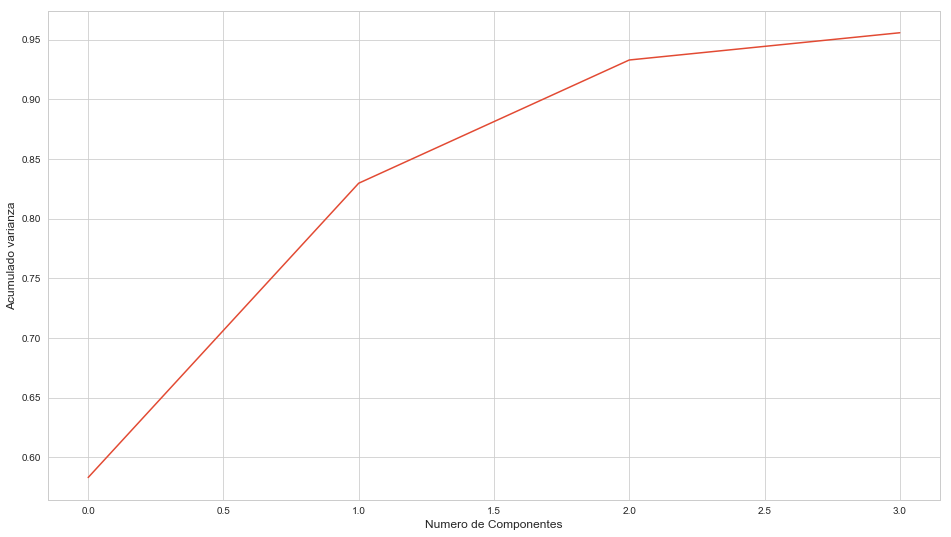

In [31]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Numero de Componentes')
plt.ylabel('Acumulado varianza')
plt.show()


**Conclusiones**

El algoritmo de K-means nos ayudará a crear clusters cuando tengamos grandes grupos de datos sin etiquetar, cuando queramos intentar descubrir nuevas relaciones entre features o para probar o declinar hipótesis que tengamos de nuestro negocio. Para este ejemplo elegimos seleccionar 4 clusters.

Con PCA obtenemos una medida de como cada variable se asocia con las otras (matriz de covarianza)
PCA combina nuestros predictores y nos permite deshacernos de los autovectores de menor importancia relativa.